# Exploration of OpenAI Gym

**Capstone Project:** To Study the Methodologies of Reinforcement Learning and to Develop an Understanding of Problem Representation in Code<br>
**Author:** Pranav Panchal<br>
**Notebook:** 2 of 3<br>
**Previous Notebook:** Basic RL Algorithm<br>
**Next Notebook:** Snake Game Agent<br>

### Table of contents
1. [What is OpenAI Gym?](#What-is-OpenAI-Gym?)
2. [Data Dictionary - Important Functions](#Data-Dictionary---Important-Functions)
3. [Frozen Lake Game](#Frozen-Lake-Game)
4. [Q-Learning](#Q-Learning)
5. [Environment](#Environment)
6. [Q-Learning Algorithm](#Q-Learning-Algorithm)
7. [Model 1](#Model-1)
8. [Model 2](#Model-2)
9. [Next Step](#Next-Step)

### What is OpenAI Gym?

OpenAI is an AI research laboratory which conducts research in the field of AI with a goal of promoting and developing AI in a way that benefits humanity as a whole.

Gym is a standard API for reinforcement learning, and contains a diverse collection of reference environments.

This notebook focus on the learning the environment of openai gym games as we will be implementing our snake game environment on the openai framework. Utilising this framework has some advantages as we are able to utilise some of it internal functions to make our snake game easier for RL implementation.

In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym
import random
import time
from IPython.display import clear_output

### Data Dictionary - Important Functions

Below are some important functions to help navigate the gym library environments: 

- env_name = gym.make("Environment") $\Longrightarrow$ Initialises the environment<br>
Additional parameters may be passed:
    - render_mode $\rightarrow$ To specify the render type of the environment.<br><br>

- env_name.reset(self) $\Longrightarrow$ Resets the environment to an initial state and returns the initial observation.<br><br>

- env_name.step(self, action) $\Longrightarrow$ Run one timestep of the environment’s dynamics.<br><br>

- env_name.render(self) $\Longrightarrow$ Render frames as specified by render_mode attribute during initialization of the environment.<br><br>

- env_name.close(self) $\Longrightarrow$ Closes the environment during end of training or testing cycle.<br><br>

- env_name.action_space $\Longrightarrow$ This attribute gives the format of valid actions.<br><br>

- env_name.observation_space $\Longrightarrow$ This attribute gives the format of valid observations.

More information about gym environments can be looked up at https://www.gymlibrary.dev/

### Frozen Lake Game

Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over the Frozen(F) lake.

<img src = "https://www.gymlibrary.dev/_images/frozen_lake.gif" width = 200>
<center><i>(Image Source: <a>https://www.gymlibrary.dev/_images/frozen_lake.gif</a>)</i></center>

In [2]:
# Run the game for 10 step
# This is a standard code available on the gym website to test the environment
# Initialize the game environment
env = gym.make("FrozenLake-v1")#, render_mode="human") # render_mode = 'human' indicates visual rendering of the game environment
                                                     # if not passed, the game will run in background and will not render

# getting the initial state of the environment
state, info = env.reset(seed=42)

total_rewards = 0
episodes = 10

# looping through the game steps
for episode in range(episodes):
    # getting a sample action from the action_space
    action = env.action_space.sample()
    
    # getting the environment variables as a consequence of taking an action
    new_state, reward, done, truncated, info = env.step(action)
    
    # checking if the game ended
    if done or truncated:
        # setting initial state of the environment and getting the state variables
        total_rewards += reward
        state, info = env.reset()
        
    # printing the game-step number to keep a track of progress
    print(f"# Episode: {episode + 1} #\t\t# Reward:{reward} #\n")


print(f"Percentage of success: {total_rewards/episodes*100}")  
# closing the environment
env.close()

# Episode: 1 #		# Reward:0.0 #

# Episode: 2 #		# Reward:0.0 #

# Episode: 3 #		# Reward:0.0 #

# Episode: 4 #		# Reward:0.0 #

# Episode: 5 #		# Reward:0.0 #

# Episode: 6 #		# Reward:0.0 #

# Episode: 7 #		# Reward:0.0 #

# Episode: 8 #		# Reward:0.0 #

# Episode: 9 #		# Reward:0.0 #

# Episode: 10 #		# Reward:0.0 #

Percentage of success: 0.0


By running the environment without any model and using random actions we notice we get 0% success. That means the agent is not reaching the Goal(G) and not receiving any rewards.

This should change by implementing a Q-learning algorithm to the environment.

### Q-Learning

Q-learning is a reinforcement learning algorithm that seeks to find the best action to take on the given current state by referring a q-table. The q-table is populated during the training phase by taking random action and updating the q-value for the state-action pair.

Initially the actions are taken at random as there is no prior knowledge of the state space. These actions may lead to reward or penalty and the q-value is updated accordingly. The ‘q’ in q-table stands for quality which represents how useful an action is in the current state to achieve future rewards.

<img src = "https://cdn-media-1.freecodecamp.org/images/xQtpQAhBocPC46-f0GRHDOK3ybrz4ZasaDo4" width = 600>
<center><i>(Image Source: <a>https://cdn-media-1.freecodecamp.org/images/xQtpQAhBocPC46-f0GRHDOK3ybrz4ZasaDo4</a>)</i></center>

An agent interacts with the environment in one of two ways. The first, it takes an action randomly. This is called `exploration` and it is used to explore the environment and discover new states. The second way is to use the q-table and select the action with returns the maximum reward for a given state. This is called `exploitation`.

There should be a balance between the `exploring` and `exploiting` steps. If the agent just keeps on `exploring`, then it is not taking the optimum steps to increase the reward. However, just sticking to `exploitation` phase also does not good, as the agent will keep on taking actions to get maximum rewards, however there may be other `state-action` pairs that result in much more reward which the agent never could explore.

<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/7c8c6f219d5ceabd052cb058a5135bfdac86dc0c" width = 900>

- $Q(s_{t},a_{t})$: the current value
- $\alpha r_{t}$: the reward $r_{t} = r(s_{t},a_{t})$ to obtain if action $a_{t}$ is taken when in state $s_{t}$ (weighted by learning rate)
- $\alpha \gamma max_{a}Q(s_{t+1},a)$: the maximum reward that can be obtained from state $s_{t+1}$ (weighted by learning rate and discount factor)

<center><i>(Source: <a>https://wikimedia.org/api/rest_v1/media/math/render/svg/7c8c6f219d5ceabd052cb058a5135bfdac86dc0c</a>)</i></center>

Some definitions:

- Learning rate ($\alpha$): Learning rate controls how quickly or slowly q-values are changing.

- Discount factor ($\gamma$): Discount parameter determines how future rewards are discounted.

- Epsilon ($\epsilon$): Rate of exploration

### Environment

In [3]:
# Specify the gym environment
env = gym.make('FrozenLake-v1')

In [4]:
# Checking the state size and action size
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
print(f"Action space size: {action_space_size}")
print(f"Observaton space size: {state_space_size}")

Action space size: 4
Observaton space size: 16


In [5]:
# Q-table initialisation, where the rows represent the state_space and the columns represent the action_space
q_table = np.zeros((state_space_size, action_space_size))

# Sanity check
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

We see 16 rows and 4 columns in our `Q-table`. The 16 rows represent the 16 different space(`state`) that our agent can take on the game board and the 4 columns represent the 4 `actions` available to it at any given time.

### Q-Learning Algorithm

In [6]:
# Q-learning algorithm
def simulate():
    env.action_space.seed(42)
    state, info = env.reset(seed=42)
    global epsilon
    for episode in range(episodes):
        # get the state of the environment
        state, info = env.reset()

        done = False

        # set the current episode reward
        rewards_current_episode = 0
        
        for step in range(max_steps_per_episode):                        

            # exploration-exploitation trade-off, randomly choose epsilon_threshold between 0 and 1
            epsilon_threshold = np.random.uniform(0, 1)
            if epsilon_threshold < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            # get the new state variables
            new_state, reward, done, truncated, info = env.step(action)

            # update the q_table for Q(s,a)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate)\
                                    + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

            # update the old state to be the new state
            state = new_state

            # update the reward of current state
            rewards_current_episode = reward

            # check for terminating condition
            if done or truncated:
                break

        # epsilon decay
        epsilon = min_epsilon\
                            + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)
#         if epsilon > min_epsilon:
#             epsilon = epsilon* epsilon_decay_rate
        
        # append the rewards received during the episode
        rewards_all_episodes.append(rewards_current_episode)
        
        # append the epsilon value in the episode
        epsilon_each_episode.append(epsilon)
        print(f"Episode: {episode}", end = "\r")

Let us now test this model by setting up some parameters

### Model 1

In [7]:
# total no. of episodes
episodes = 10000

# max steps to be taken during an episode, if this is not specified the game will run till it reaches termination state
max_steps_per_episode = 100

# learning parameters
learning_rate = 0.2
discount_rate = 0.9
epsilon = 1
max_epsilon = 1
min_epsilon = 0.01
epsilon_decay_rate = 0.01

# store each episode variables
rewards_all_episodes = []
epsilon_each_episode = []

# initiallize the Q-table
q_table = np.ones((state_space_size, action_space_size)) * 10**-6

# Run the model
simulate()

Our agent has completed training and we can check how the `Q-table` has been populated by our agent.

In [8]:
# print updated Q-table
print("# Q-Table #\n")
print(q_table)

# Q-Table #

[[4.49451540e-02 6.57903654e-02 4.63474138e-02 4.59300965e-02]
 [3.04184036e-02 3.23755649e-02 3.16934801e-02 5.42498801e-02]
 [3.80919531e-02 8.01694685e-02 4.57301405e-02 2.34906839e-02]
 [1.48070090e-02 1.53089192e-02 1.27067953e-02 4.58110564e-02]
 [9.77140421e-02 3.58090338e-02 6.28631417e-02 2.98214949e-02]
 [1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06]
 [1.41805786e-02 4.38796450e-03 1.47465185e-01 2.00614571e-02]
 [1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06]
 [5.02365792e-02 8.18168528e-02 3.29193913e-02 1.69315062e-01]
 [1.20535817e-01 2.42047750e-01 1.56204876e-01 1.11846251e-01]
 [1.77666780e-01 3.16791886e-01 1.41534477e-01 6.19869104e-02]
 [1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06]
 [1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06]
 [1.56390414e-01 2.15515064e-01 3.92603840e-01 2.04369029e-01]
 [3.61733771e-01 4.47861042e-01 6.95874525e-01 3.47034498e-01]
 [1.00000000e-06 1.00000000e-06 1.00000000

We notice some rows now show small positive numbers in range $10^{-2}$, whereas a few are in range $10^{-6}$ accross all columns. The rows which are showing $10^{-6}$ correspond to the terminating stage of the game. There are 5 rows with $10^{-6}$ which represent the 4 Holes(H) and 1 Goal(G).


Lets check the average game reward received by the agent.

In [9]:
# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = []
avg_rewards_per_thousand = []

rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), episodes / 1000)
count = 1000
print("# Average reward per thousand episodes: #")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r) / 1000))
    avg_rewards_per_thousand.append((sum(r) / 1000))
    count += 1000

# Average reward per thousand episodes: #
1000 :  0.37
2000 :  0.482
3000 :  0.44
4000 :  0.463
5000 :  0.501
6000 :  0.437
7000 :  0.392
8000 :  0.457
9000 :  0.472
10000 :  0.441


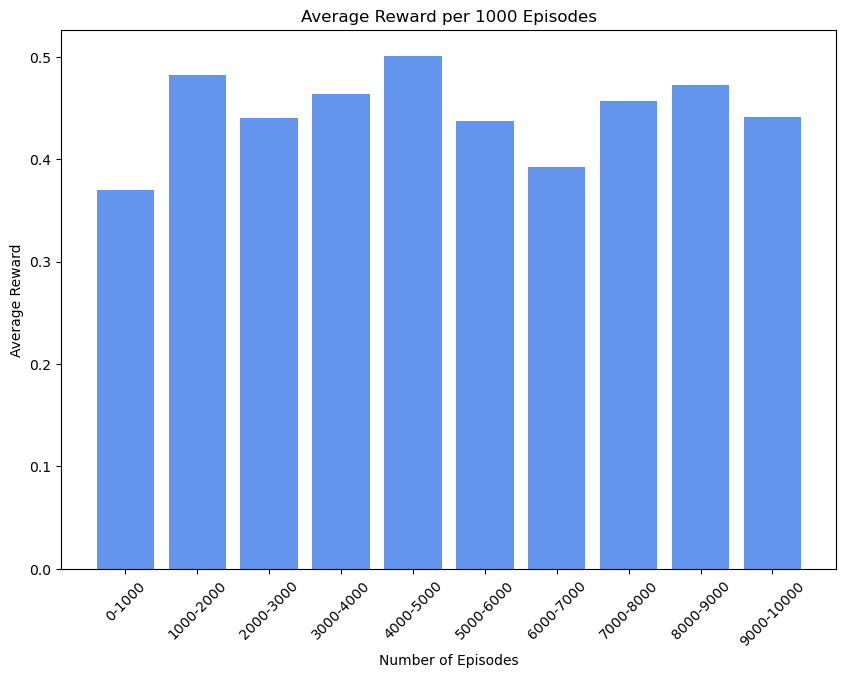

In [10]:
x_ticks = ['0-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','6000-7000','7000-8000','8000-9000','9000-10000']
plt.figure(figsize = (10, 7))
plt.bar(x_ticks, avg_rewards_per_thousand, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.xticks(rotation=45)
plt.ylabel("Average Reward")
plt.title("Average Reward per 1000 Episodes")
plt.show()

In the FrozenLake problem the agent is given a reward of 1 if it reaches the Goal(G), no points are given when the agent is on the Frozen(F) or falls in the Hole(H).

Using this knowledge, we can see that the average of 1000 episodes increase as the number of total episodes increase. This indicates that our agent is learning and at the end of the training our agent can reach the Goal(G) ~40-50% of time. Also, we notice a lot of fluctuations in the results, which means the model is less confident.



Lets look at the plot for reward and value of epsilon during the training phase.

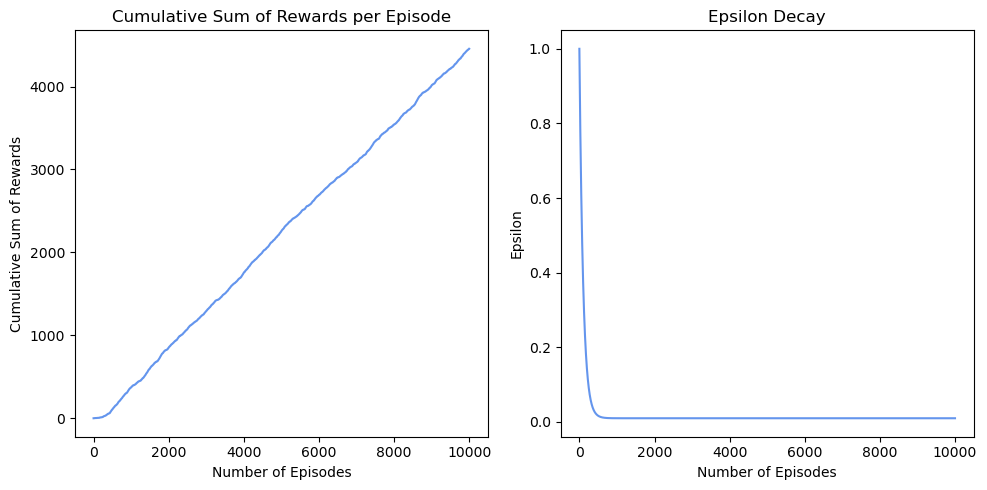

In [11]:
plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(rewards_all_episodes), color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.ylabel("Cumulative Sum of Rewards")
plt.title("Cumulative Sum of Rewards per Episode")

plt.subplot(1, 2, 2)
plt.plot(epsilon_each_episode, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.ylabel("Epsilon")
plt.title("Epsilon Decay")

plt.tight_layout()
plt.show()

Looking at the cumulative sum per episode we notice a rough inflection point at around 500 episodes, beyond which the cumulative reward increases consistently. Observing the same area of 500 episode on the epsilon decay graph we see the value of epsilon reaches nearly 0.1 which is the minimum value we have set.

This means that beyond 500 episodes exploration is at minimum and no learning happens. This can be verified by the constant slope of the cumulative sum of rewards.

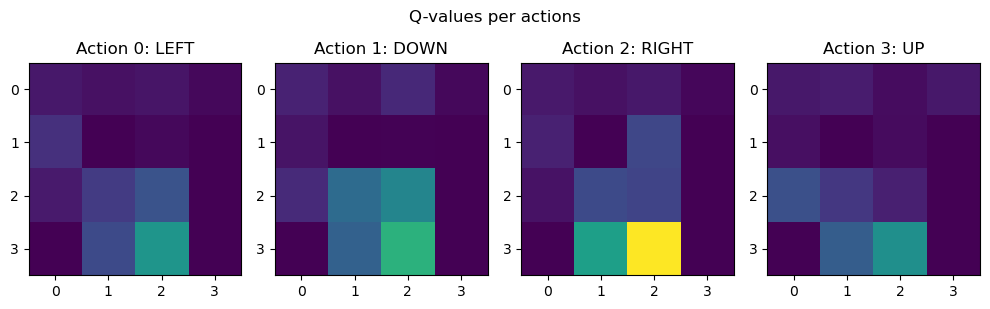

In [12]:
# Show update Q values
plt.subplots(1, 4, figsize=(10, 3))
plt.subplot(1, 4, 1)
plt.imshow(q_table.T[0].reshape(4,4), vmin=np.min(q_table), vmax=np.max(q_table))
plt.title('Action 0: LEFT')
plt.subplot(1, 4, 2)
plt.imshow(q_table.T[1].reshape(4,4), vmin=np.min(q_table), vmax=np.max(q_table))
plt.title('Action 1: DOWN')
plt.subplot(1, 4, 3)
plt.imshow(q_table.T[2].reshape(4,4), vmin=np.min(q_table), vmax=np.max(q_table))
plt.title('Action 2: RIGHT')
plt.subplot(1, 4, 4)
plt.imshow(q_table.T[3].reshape(4,4), vmin=np.min(q_table), vmax=np.max(q_table))
plt.title('Action 3: UP')
plt.suptitle("Q-values per actions")
plt.tight_layout()
plt.show()

The above heatmaps represent the q-values for different actions for each grid location on the game map. The dark colors represent low values and lighter colors represent higher values.

This performance is not the best and it can be improved further by adjusting the training parameters.

### Model 2

Since the `epsilon` decaying much quicker, we can decrease its decay rate. We would also reduce `learning rate(alpha)` and increase the `discount rate(gamma)`.

In [13]:
# total no. of episodes
episodes = 10000

# max steps to be taken during an episode, if this is not specified the game will run till it reaches termination state
max_steps_per_episode = 100

# learning parameters
learning_rate = 0.1
discount_rate = 0.995
epsilon = 1
max_epsilon = 1
min_epsilon = 0.01
epsilon_decay_rate = 0.001

# store each episode variables
rewards_all_episodes = []
epsilon_each_episode = []

# initiallize the Q-table
q_table = np.ones((state_space_size, action_space_size)) * 10**-6

# Run the model
simulate()

In [14]:
# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = []
avg_rewards_per_thousand = []

rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), episodes / 1000)
count = 1000
print("# Average reward per thousand episodes: #")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r) / 1000))
    avg_rewards_per_thousand.append((sum(r) / 1000))
    count += 1000

# Average reward per thousand episodes: #
1000 :  0.047
2000 :  0.21
3000 :  0.423
4000 :  0.597
5000 :  0.636
6000 :  0.642
7000 :  0.645
8000 :  0.678
9000 :  0.678
10000 :  0.66


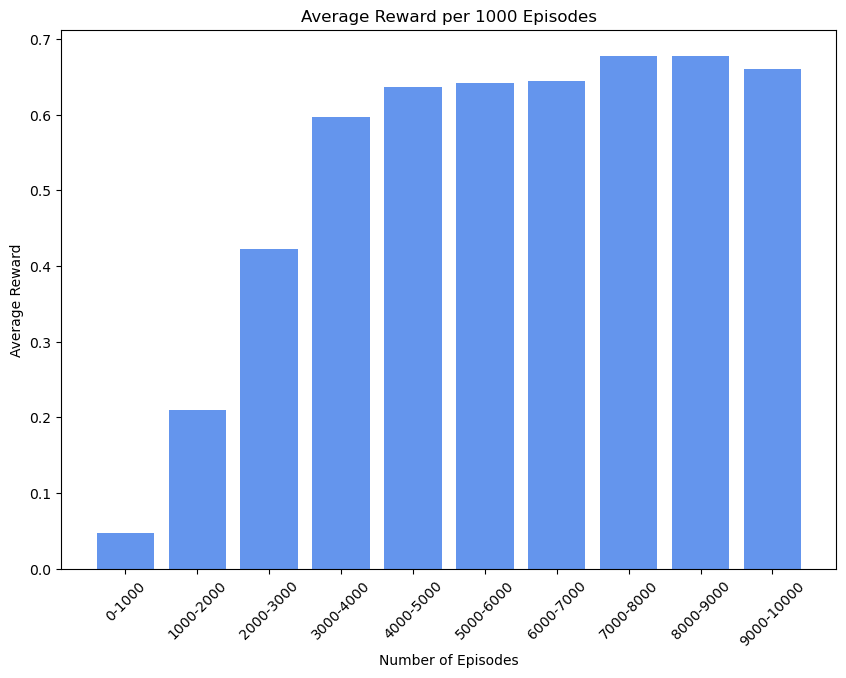

In [15]:
plt.figure(figsize = (10, 7))
plt.bar(x_ticks, avg_rewards_per_thousand, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.xticks(rotation=45)
plt.ylabel("Average Reward")
plt.title("Average Reward per 1000 Episodes")
plt.show()

After the changing the parameters of the training we see that the performance of the model has improved. The fluctuations in the rewards have decreased and also, we are seeing much higher average rewards.

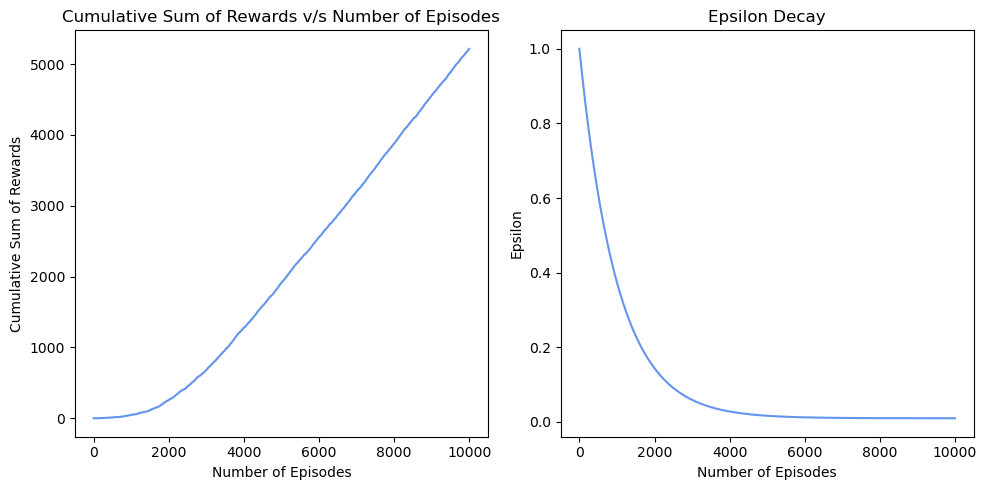

In [16]:
plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(rewards_all_episodes), color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.ylabel("Cumulative Sum of Rewards")
plt.title("Cumulative Sum of Rewards v/s Number of Episodes")

plt.subplot(1, 2, 2)
plt.plot(epsilon_each_episode, color = 'cornflowerblue')
plt.xlabel("Number of Episodes")
plt.ylabel("Epsilon")
plt.title("Epsilon Decay")

plt.tight_layout()
plt.show()

On observing the plots we notice that the inflection point is much gradual and has also shifted towards the right. Now the learning happens till episode 4000 beyond which we see a constant slope for the cumulative sum of rewards.

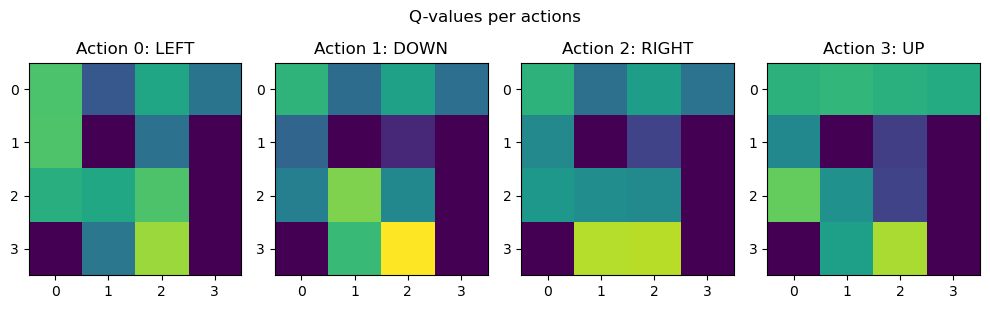

In [17]:
# Show update Q values
plt.subplots(1, 4, figsize=(10, 3))
plt.subplot(1, 4, 1)
plt.imshow(q_table.T[0].reshape(4,4), vmin=np.min(q_table), vmax=np.max(q_table))
plt.title('Action 0: LEFT')
plt.subplot(1, 4, 2)
plt.imshow(q_table.T[1].reshape(4,4), vmin=np.min(q_table), vmax=np.max(q_table))
plt.title('Action 1: DOWN')
plt.subplot(1, 4, 3)
plt.imshow(q_table.T[2].reshape(4,4), vmin=np.min(q_table), vmax=np.max(q_table))
plt.title('Action 2: RIGHT')
plt.subplot(1, 4, 4)
plt.imshow(q_table.T[3].reshape(4,4), vmin=np.min(q_table), vmax=np.max(q_table))
plt.title('Action 3: UP')
plt.suptitle("Q-values per actions")
plt.tight_layout()
plt.show()

The heatmap of the `q-values` are brighter indicating higher `q-values`, which mean more confidence. Also notice how these heatmap reflect the game grid shown below.

The bottom middle 2 squares are much brighter especially in the `RIGHT` action as that is the only way to reach the Goal(G).

<img src = "https://www.gymlibrary.dev/_images/frozen_lake.gif" width = 200>
<center><i>(Image Source: <a>https://www.gymlibrary.dev/_images/frozen_lake.gif</a>)</i></center>

We can now use this Q-table to run test scenarios of the FrozenLake environment.

In [18]:
env = gym.make('FrozenLake-v1')#, render_mode = 'human')

total_rewards = 0
episodes = 10
for episode in range(episodes):
    state, info = env.reset()
    done = False
#     print(f"# Episode: {episode + 1} #\t\t")
#     time.sleep(1)
    
    for step in range(max_steps_per_episode):
#         clear_output(wait = True)
#         env.render()
#         time.sleep(0.01)
        
        
        action = np.argmax(q_table[state, :])
        new_state, reward, done, truncated, info = env.step(action)
        
        if done or truncated:                
            total_rewards += reward
            print(f"# Episode: {episode + 1} #\t\t# Reward:{reward} #\n")
            break
            
        
        state = new_state
        
print(f"Percentage of success: {total_rewards/episodes*100}")        
env.close()

# Episode: 1 #		# Reward:1.0 #

# Episode: 2 #		# Reward:1.0 #

# Episode: 3 #		# Reward:1.0 #

# Episode: 4 #		# Reward:0.0 #

# Episode: 5 #		# Reward:1.0 #

# Episode: 6 #		# Reward:1.0 #

# Episode: 7 #		# Reward:0.0 #

# Episode: 8 #		# Reward:0.0 #

# Episode: 9 #		# Reward:1.0 #

# Episode: 10 #		# Reward:1.0 #

Percentage of success: 70.0


### Next Step

We have successfully implemented and optimized the Q-learning algorithm on the FrozenLake environment. This exercise should help us in modeling our own Snake game environment and implementing a Q-learning model on the same. This is discussed in the next notebook.